<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week5/Day1/Daily_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -k kaggle
from google.colab import files
files.upload()

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d unsdsn/world-happiness

In [ ]:
! unzip 'world-happiness.zip'

In [30]:
import pandas as pd

df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [10]:
df.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [11]:
missing_values = df.isnull()
print(missing_values.sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [12]:
df.duplicated().sum()

0

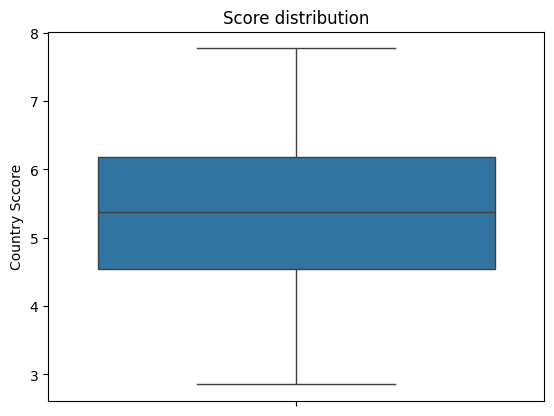

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of score through box plot, checking no outliers
sns.boxplot(data=df,y='Score')
plt.ylabel('Country Sccore')
plt.title('Score distribution')
plt.show()

<ipython-input-21-84811a883a68>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.3, cmap='viridis')


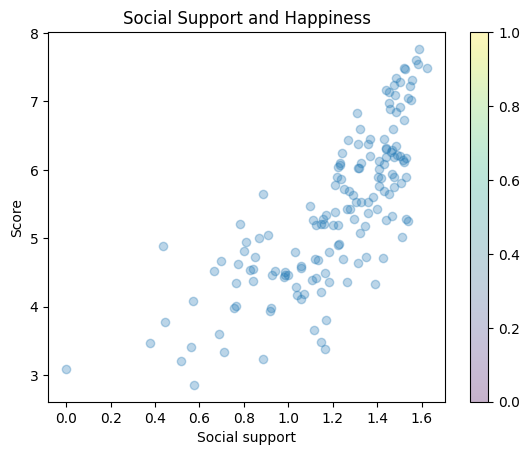

In [21]:
import numpy as np

# Sample data
np.random.seed(0)
x = df['Social support']
y = df['Score']
# colors = np.random.rand(25)
# sizes = 1000 * np.random.rand(25)

plt.scatter(x, y, alpha=0.3, cmap='viridis')
plt.colorbar()  # Shows color scale
plt.xlabel('Social support')
plt.ylabel('Score')
plt.title("Social Support and Happiness")
plt.show()

In [40]:
#Filter the top 10 countries with the highest GDP
top_10_GDP = df.nlargest(10, ['GDP per capita'])


#Filter the top 10 countries with the highest health values
top_10_health = df.nlargest(10, ['Healthy life expectancy'])

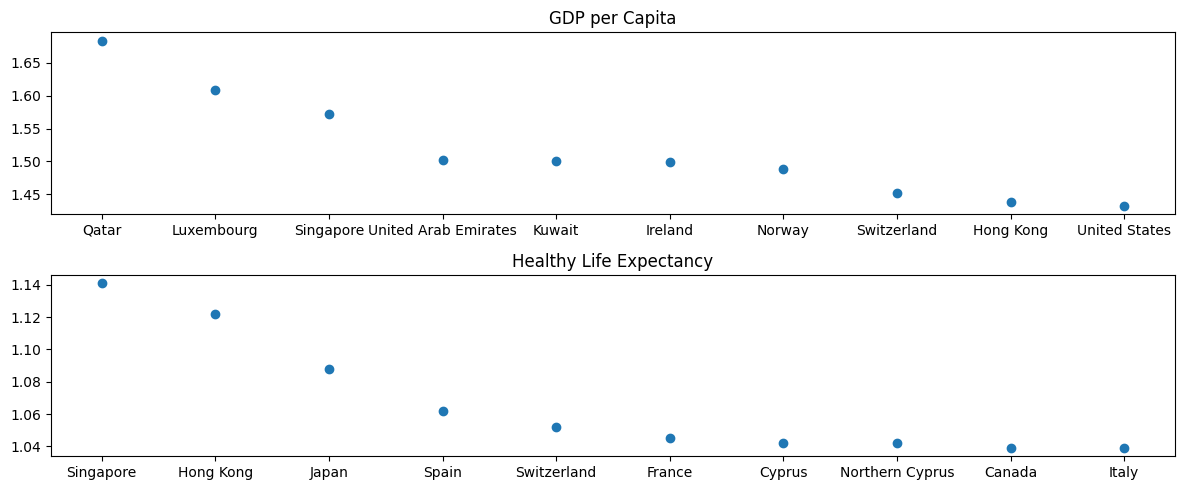

In [44]:
# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 5))

# First subplot
ax1.scatter(top_10_GDP['Country or region'], top_10_GDP['GDP per capita'])
ax1.set_title('GDP per Capita')

# Second subplot
ax2.scatter(top_10_health['Country or region'], top_10_health['Healthy life expectancy'])
ax2.set_title('Healthy Life Expectancy')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the figure
plt.show()

In [ ]:
# List of countries to filter
selected_countries = ['Argentina', 'Spain', 'Italy', 'Israel', 'United States', 'South Africa']

# Filter the DataFrame to include only the selected countries
GDP_selected = df[df['Country or region'].isin(selected_countries)]

health_selected =df[df['Country or region'].isin(selected_countries)]


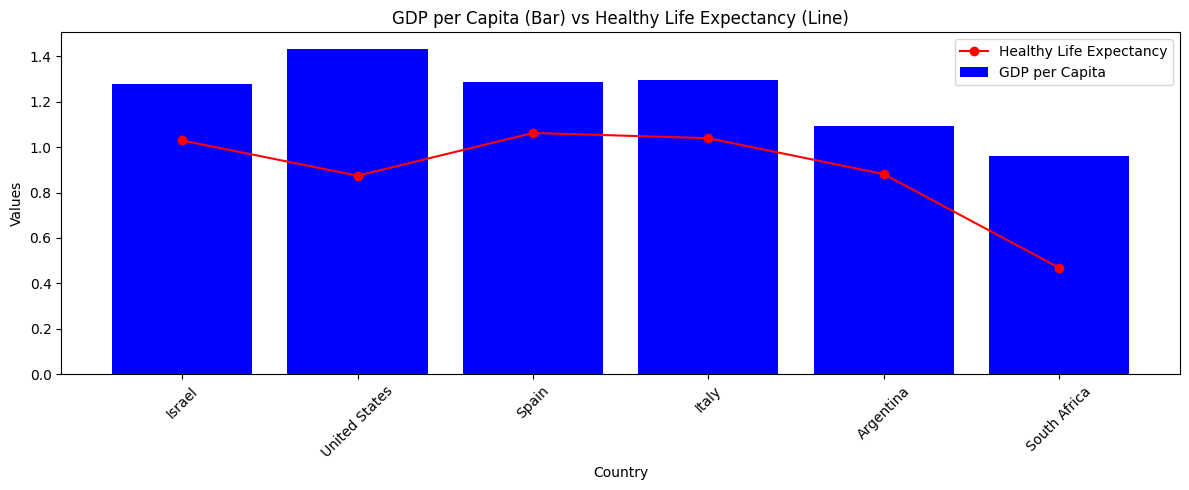

In [55]:
# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot GDP per capita as bars
ax.bar(GDP_selected['Country or region'], GDP_selected['GDP per capita'], color='blue', label='GDP per Capita')

# Plot healthy life expectancy as a line
ax.plot(health_selected['Country or region'], health_selected['Healthy life expectancy'], color='red', marker='o', label='Healthy Life Expectancy')

# Set labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Values')
ax.set_title('GDP per Capita (Bar) vs Healthy Life Expectancy (Line)')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()
